###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from ([this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/Wave%20Propagation%20%26%20Analytical%20Solutions/Greens_function_acoustic_1-3D.ipynb)) by Kristina Garina, Ashim Rijal and Heiner Igel ([@heinerigel](https://github.com/heinerigel)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO, CAS

# 声波方程的格林函数和地震图的计算

在前几课中，我们推导了描述波在三维、二维和一维弹性和声波介质中的传播的运动方程。在用有限差分(FD)数值解偏微分方程之前，我们应该估计一些解析解。

这不仅有助于检查有限差分代码是否包含任何错误，而且还有助于了解与解析解相比，数值解的准确性。

## 一维格林函数  


让我们从一个简单的问题开始, 就像对于运动方程 **一维声学模型** 假设一个常密度模型一样, 推导过程在 [Lesson 3](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/01_Analytical_solutions/3_Acoustic_medium.ipynb) and [4](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/01_Analytical_solutions/4_2D_1D_elastic_acoustic_approx.ipynb):

\begin{equation}
\frac{\partial^2 P}{\partial t^2} - V_p^2\frac{\partial^2 P}{\partial x^2} = f\nonumber
\end{equation}

如果我们引入狄拉克函数:

$$
\delta(x) = \left\{
\begin{array}{ll}
	\infty &x=0 \\
	0 &x\neq 0 	
\end{array}
\right.
$$

在归一化条件下

$$
\int_{-\infty}^{\infty} \delta(x)\; dx = 1
$$

作为声波方程的源项:

\begin{equation}
f = \delta(t-t_s) \delta(x-x_s) \nonumber
\end{equation}

我们称之为一维波动方程的解:

\begin{equation}
\frac{\partial^2 G_1}{\partial t^2} - V_p^2 \frac{\partial^2 G_1}{\partial x^2} = \delta(t-t_s) \delta(x-x_s)
\end{equation}

**格林函数** $\mathbf{G_1(x,t;x_s,t_s)}$. 这意味着我们把源放在 $x = x_s$. **震源时间函数** 描述了震源随时间的变化. 在此情况下，震源时间函数拥有振幅$1\; \frac{Pa}{s^2}$ 仅在 $t = t_s$ 时刻下, 否则振幅为0. 在接收位置x和时间t处记录压力波场.

下面推导格林函数, 我们假设一个特殊的源位于 $x_s = 0\; m$ 和源时间 $t_s = 0\; s$, 将式(1)简化为


\begin{equation}
\frac{\partial^2 G_1}{\partial t^2} - V_p^2 \frac{\partial^2 G_1}{\partial x^2} = \delta(t) \delta(x)
\end{equation}

此外，地下p波速度分布是恒定的:

\begin{equation}
V_p(x) = V_{p0} = const. \nonumber
\end{equation}

格林函数可以用不同的方法来计算. 我们试着在傅里叶域中找到一个解. 首先, 我们进行时间 **傅里叶变换** 

\begin{equation}
\hat{f}(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt\nonumber
\end{equation}

这里 $\omega$ 代表角频率, 对于方程(2):

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\biggl\{\frac{\partial^2 G_1(x,t)}{\partial t^2} - V_{p0}^2\frac{\partial^2 G_1(x,t)}{\partial x^2}\biggl\} e^{-i\omega t} dt = \frac{1}{2 \pi} \int_{-\infty}^{\infty}\delta(t) \delta(x) e^{-i\omega t} dt \nonumber
\end{equation}

利用性质:

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\biggl\{\frac{\partial^2 G_1}{\partial t^2}\biggl\} e^{-i\omega t} dt = -\omega^2 \hat{G}_1(x,\omega) \nonumber
\end{equation}

和

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\delta(t) e^{-i\omega t} dt = \frac{1}{2 \pi} e^{-i\omega 0} = \frac{1}{2 \pi}\nonumber
\end{equation}

我们可以去掉LHS上的二阶时间导数和RHS上依赖时间的 $\delta$ 函数:


\begin{equation}
-\omega^2 \hat{G}_1(x,\omega) - V_{p0}^2\frac{\partial^2 \hat{G}_1(x,\omega)}{\partial x^2} = \frac{1}{2 \pi} \delta(x)
\end{equation}

接下来，我们应用空间傅里叶变换

\begin{equation}
\hat{f}(k) = \frac{1}{2\pi}\int_{-\infty}^{\infty} f(x) e^{-ikx} dx,\nonumber
\end{equation}

这里 $k$ 代表波数, 对于方程(3):

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\biggl\{-\omega^2\hat{G}_1(x,\omega) - V_{p0}^2\frac{\partial^2 \hat{G}_1(x,\omega)}{\partial x^2}\biggr\} e^{-ikx} dx = \frac{1}{4 \pi^2}\int_{-\infty}^{\infty}\delta(x) e^{-ikx} dx\nonumber
\end{equation}

利用和时域傅里叶变换相同的性质，我们得到:

\begin{equation}
-\omega^2 \hat{G}_1(k,\omega) + k^2 V_{p0}^2 \hat{G}_1(k,\omega) = \frac{1}{4 \pi^2}\nonumber
\end{equation}

解得 $\hat{G}_1(k,\omega)$:

\begin{equation}
\hat{G}_1(k,\omega) = \frac{1}{4 \pi^2} \frac{1}{V_{p0}^2 k^2 - \omega^2} = \frac{1}{4 \pi^2 V_{p0}^2} \frac{1}{k^2 - \frac{\omega^2}{V_{p0}^2}}
\end{equation}

我们已经得到 **频率波数域一维声波方程的格林函数解**.

为了得到时域解，我们首先应用空间傅里叶反变换对方程 (4)

\begin{equation}
\hat{G}_1(x,\omega) = \frac{1}{4 \pi^2 V_{p0}^2}\int_{-\infty}^{\infty} \frac{e^{ikx}}{k^2 - \frac{\omega^2}{V_{p0}^2}}dk \notag
\end{equation}

这个积分有两个极点在 $k = \pm \frac{\omega}{V_p}$, 所以我们要沿着极点的等高线积分. 更多的细节可参考 
[S.W. Rienstra & A. Hirschberg (2017): An Introduction to Acoustics](https://www.win.tue.nl/~sjoerdr/papers/boek.pdf)

结果是 **频率空间域** 的解:



\begin{equation}
\hat{G}_1(x,\omega) =  \frac{e^{-i\omega|x|/V_{p0}}}{4 \pi i V_{p0} \omega}. \nonumber
\end{equation}

这对于测试频域有限差分编码的准确性非常有用，我们将在后面的课程中进行讨论。为了转换到时域我们必须在极点处积分 $\omega=0$:

\begin{equation}
\hat{G}_1(x,t) =  \frac{1}{4 \pi i V_{p0}}\int_{-\infty}^{\infty}\frac{e^{i\omega(t-|x|/V_{p0})}}{\omega} d\omega. \nonumber
\end{equation}

这最终引出了一维均匀声学的格林函数:

\begin{equation}
G_1(x,t)=\dfrac{1}{2V_{p0}}H\biggl(t-\dfrac{|x|}{V_{p0}}\biggr),\nonumber
\end{equation}

这里 $H$ 代表 **Heaviside function**:

$$
H(x) = \left\{
\begin{array}{ll}
	0 &x<0 \\
	1 &x\geq 0 	
\end{array}
\right.
$$

更一般地说，我们可以替换:

\begin{align}
x &\rightarrow x - x_s,\nonumber\\
t &\rightarrow t - t_s,\nonumber\\
\end{align}

我们得到:

\begin{equation}
G_1(x,t)=\dfrac{1}{2V_{p0}}H\biggl((t-t_s)-\dfrac{|x-x_s|}{V_{p0}}\biggr),\nonumber
\end{equation}

所以一维函数是一个震源和接收器之间的走时延迟的Heaviside函数。还要注意偏移量 $|x-x_s|$ 的绝对值意味着我们有一个向左传播的波和一个向右传播的波。让我们画出1D Green的函数。


In [1]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define parameters
vp0 = 1.        # velocity m/s 
r = 2.          # distance from source
tmax = 5.       # length of seismogram (s)
nt = 3000       # number of time samples
dt = tmax/nt    # time increment
ts = 0          # source time


# Acquisition geometry
xs=0            # coordinates of source
ys=0
zs=0

xr=r            # coordinates of receiver
yr=0
zr=0

In [4]:
# Define time vector
time = np.arange(0,tmax,dt)
time

array([0.00000000e+00, 1.66666667e-03, 3.33333333e-03, ...,
       4.99500000e+00, 4.99666667e+00, 4.99833333e+00])

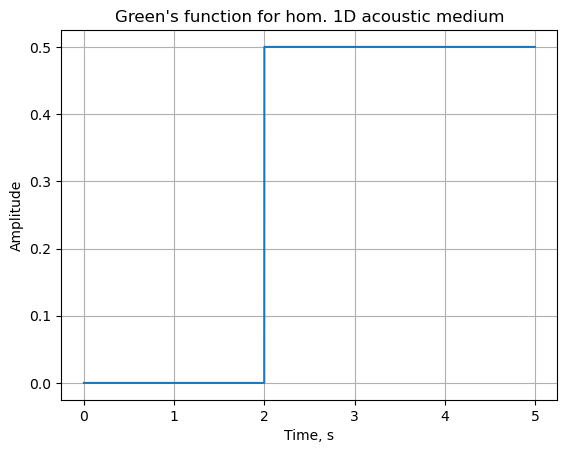

In [5]:
# Calculating Green's function in 1D

G1=np.zeros(nt)      # initialization G with zeros

for i in range (nt):
    if (((time[i]-ts)-abs(xr-xs)/vp0)>=0):
        G1[i]=1./(2*vp0)
    else:
        G1[i]=0

# Plotting Green's function in 1D
plt.plot(time, G1)
plt.title("Green's function for hom. 1D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## 二维格林函数  

使用与一维介质相同的方法，我们可以计算 **二维格林函数** $\mathbf{G_2(x,t;x_s,t_s)}$, 这是由

\begin{equation}
\frac{\partial^2 G_2}{\partial t^2} - V_{p0}^2 \biggl(\frac{\partial^2 G_2}{\partial x^2} + \frac{\partial^2 G_2}{\partial z^2} \biggl)= \delta(t-t_s) \delta(x-x_s) \delta(z-z_s) \nonumber
\end{equation}

和

\begin{equation}
G_2(x,z,t) = \dfrac{1}{2\pi V_{p0}^2}\dfrac{H\biggl((t-t_s)-\dfrac{|r|}{V_{p0}}\biggr)}{\sqrt{(t-t_s)^2-\dfrac{r^2}{V_{p0}^2}}} \nonumber 
\end{equation}

震源和接收器之前的距离 (offset)

$r = \sqrt{(x-x_s)^2+(z-z_s)^2}$

与一维格林函数相比，由于二维近似引入了无限线源的辐射特性，我们得到了一个阻尼Heaviside函数。我们再画出2D的格林函数。

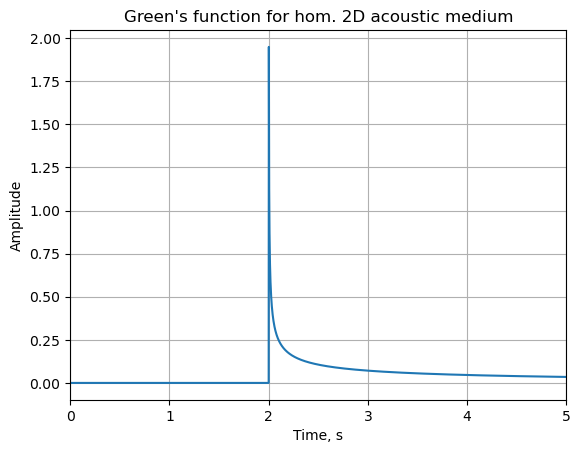

In [20]:
# Calculation of 2D Green's function

G2=np.zeros(nt)                    # initialization G with zeros
r=np.sqrt((xs-xr)**2+(ys-yr)**2)

for i in range (nt):
    if (((time[i]-ts)-abs(r)/vp0)>0):
        G2[i]=(1./(2*np.pi*vp0**2))*(1./np.sqrt((time[i]-ts)**2-(r**2/vp0**2)))
    else:
        G2[i]=0
           
# Plotting Green's function in 2D
plt.plot(time, G2)
plt.title("Green's function for hom. 2D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

## 三维格林函数  

最终，我们得到 **三维格林函数** $\mathbf{G_3(x,t;x_s,t_s)}$, 这是由

\begin{equation}
\frac{\partial^2 G_3}{\partial t^2} - V_{p0}^2 \biggl(\frac{\partial^2 G_3}{\partial x^2} + \frac{\partial^2 G_3}{\partial y^2} +\frac{\partial^2 G_3}{\partial z^2} \biggl)= \delta(t-t_s) \delta(x-x_s) \delta(y-y_s) \delta(z-z_s) \nonumber
\end{equation}

像 

\begin{equation}
G_3(x,y,z,t) = \dfrac{1}{4 \pi V_{p0}^2 r}\delta\biggl((t-t_s)-\frac{r}{V_{p0}}\biggr) \nonumber 
\end{equation}

震源和接收器之前的距离 (offset)

$r = \sqrt{(x-x_s)^2+(y-y_s)^2+(z-z_s)^2}$

因此，对于均匀声介质，3D Green函数是一个被源和接收器之间的旅行时间延迟的Delta分布。为了计算三维格林函数，我们必须近似 $\delta-$ 函数. boxcar函数就是一个例子

$$
\delta_{bc}(x) = \left\{
\begin{array}{ll}
	1/dx &|x|\leq dx/2 \\
	0 &\text{elsewhere} 	
\end{array}
\right.
$$

实现 $\delta$ 函数的属性为 $dx \rightarrow\; 0$. 这个函数用来适当缩放源项以获得正确的绝对振幅。


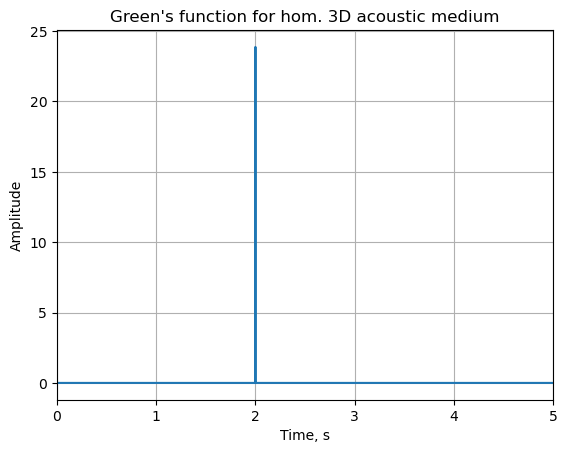

In [6]:
# Calculation of 3D Green's function

G3=np.zeros(nt)                                # initialization G with zeros

r=np.sqrt((xs-xr)**2+(ys-yr)**2+(zs-zr)**2)    # defining offset
amp=1./(4*np.pi*(vp0**2)*r)                    # defining amplitudes
t_arr=ts+(r/vp0)                               # time arrival
i_arr=t_arr/dt
b=int(i_arr)
G3[b]= amp/dt

# Plotting Green's function in 3D
plt.plot(time, G3)
plt.title("Green's function for hom. 3D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

##### Exercise

Derive the Green's function solutions of the 2D elastic SH problem:

\begin{align}
\rho\frac{\partial^2 u_y}{\partial t^2} - \frac{\partial}{\partial x} \mu \frac{\partial u_y}{\partial x} - \frac{\partial}{\partial z} \mu \frac{\partial u_y}{\partial z} &= f_y\nonumber \\
\end{align}

and 1D elastic SH problem:

\begin{align}
\rho\frac{\partial^2 u_y}{\partial t^2} - \frac{\partial}{\partial x} \mu \frac{\partial u_y}{\partial x} &= f_y.\nonumber \\
\end{align}

Assume a constant distribution of the shear modulus $\mu(x,z) = \mu_0 =  const. \neq 0\; Pa$ and density $\rho(x,z) = \rho_0 = const. \neq 0\; \frac{kg}{m^3}$ in the subsurface.

*Hint: To solve this problem, you do not have to apply any Fourier transform or integrate along contours around poles*

## 地震图的计算

在现场数据应用中，我们不能像delta分布那样激发一个源时间函数，它会有一个完美的白光谱(所有频率都被一次激发)。稍后我们将看到，当用时域有限差分方法显式计算格林函数时，会出现一些数值问题。


相反，我们必须依赖有限频的震源信号。任意震源小波的地震图可以由格林函数计算。在下面的例子中，源小波由高斯函数的一阶导数组成。

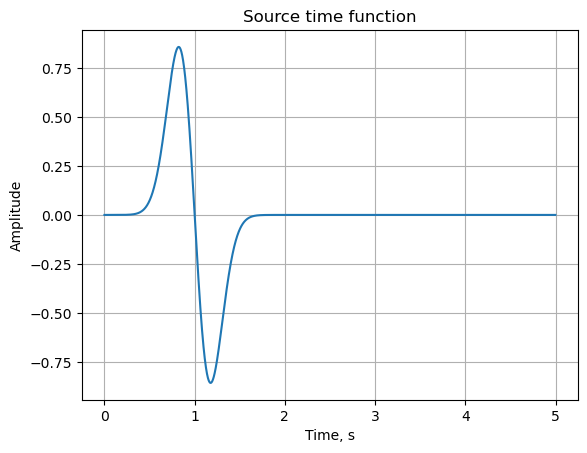

In [7]:
# Defining source time function
f0 = 1           # Frequency (Hz)
p=1./f0          # period
t0 = p/dt        # defining t0
sigma=4./p      

# Initialization of source-time function
src=np.zeros(nt) 
source=np.zeros(nt)

# Initialization of first derivative of gaussian
for it in range(nt):
    t=(it-t0)*dt
    src[it]=-2*sigma*t*np.exp(-(sigma*t)**2)
source[0:nt]=src

# Plotting of source time function
plt.plot(time, src)
plt.title('Source time function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

##### 练习

地震图的计算 $G_{seis}(x,t)$ 对于一维,二维和三维声学介质,看看做是格林函数 $G(x,t;x_s,t_s)$ 和地震子波 $s(t)$ 的卷积:

$$G_{seis}(x,t) = G(x,t;x_s,t_s) * s(t)$$

Plot the resulting seismograms together with the Green's function solutions.

*Hints:* 
* Use the NumPy function np.convolve. 
* How could you check if your implemented convolution is correct?

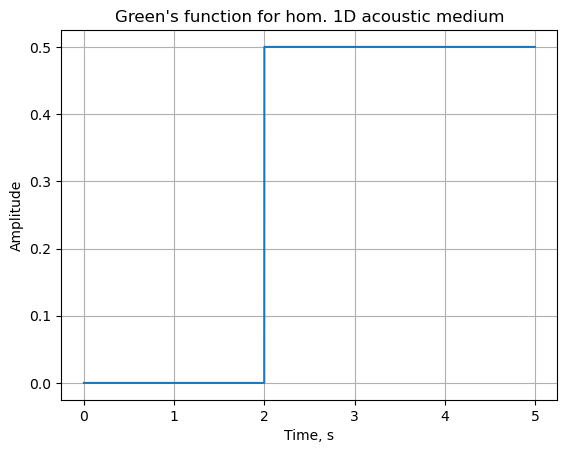

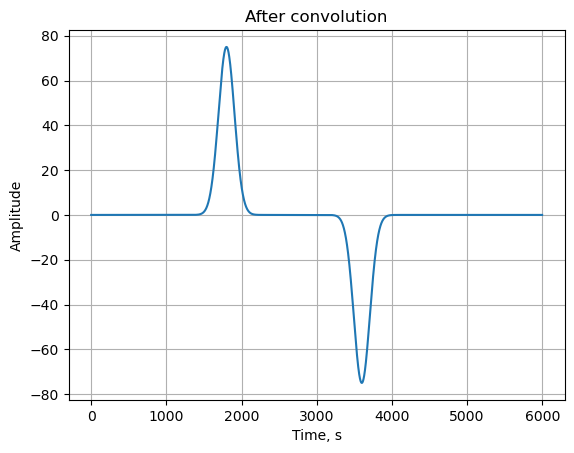

In [18]:
# Computation of 1D seismogram

# Convolution of Green's function with the 1st derivative of a Gaussian
# COMPUTE YOUR SEISMOGRAM HERE!
G1_seis=src

# Plotting Green's function in 1D
plt.plot(time, G1)
plt.title("Green's function for hom. 1D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

seis1 = np.convolve(G1,G1_seis)
# Plotting convolved Green's function in 1D
# PLOT YOUR SEISMOGRAM HERE!
plt.plot(seis1)
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
#plt.xlim (0, tmax)
plt.grid()
plt.show()

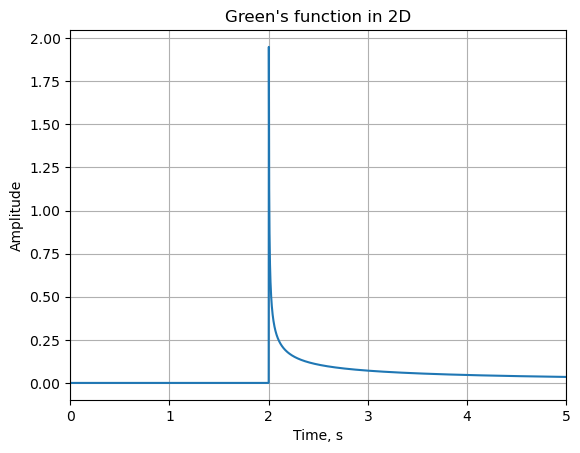

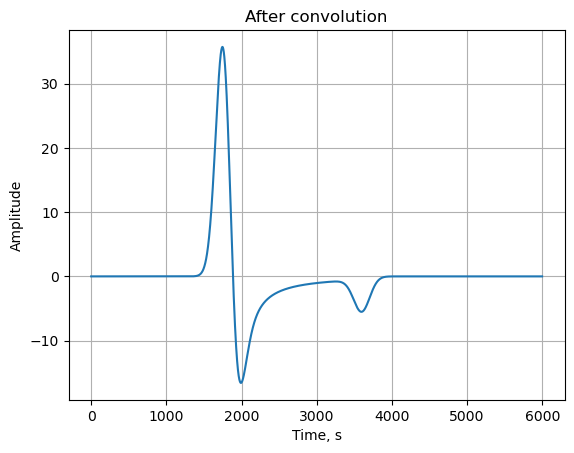

In [21]:
# Convolution of Green's function with the 1st derivative of a Gaussian
# COMPUTE YOUR SEISMOGRAM HERE!
G2_seis=src

# Plotting Green's function in 2D
plt.plot(time, G2)
plt.title("Green's function in 2D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

seis2 = np.convolve(G2,G2_seis)
# Plotting convolved Green's function in 1D
# PLOT YOUR SEISMOGRAM HERE!
plt.plot(seis2)
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
# plt.xlim((0, tmax))
plt.grid()

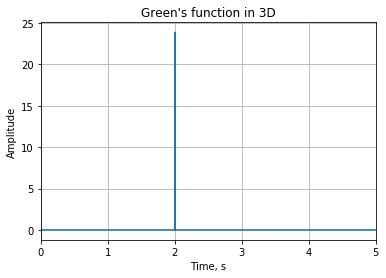

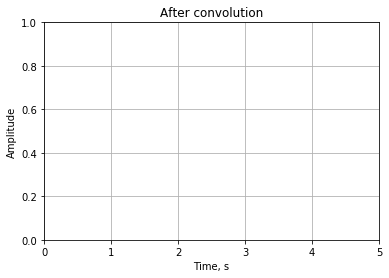

In [11]:
# Convolution of Green's function with the 1st derivative of a Gaussian
# COMPUTE YOUR SEISMOGRAM HERE!
#G3_seis =

# Plotting Green's function in 3D
plt.plot(time, G3)
plt.title("Green's function in 3D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

# Plotting convolved Green's function in 1D
# PLOT YOUR SEISMOGRAM HERE!
# plt.plot()
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim (0, tmax)
plt.grid()
plt.show()

## 我们学习到:

* 一维、二维、三维情况下解析格林函数的计算
* 震源时间函数的定义
* 格林函数与源时间函数的卷积